In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import copy
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../data/Bioliq_S-MAB_1wx20_MI_1000_100.csv", header=None)

In [3]:
masterdata.shape

(6039, 190)

In [4]:
masterdata.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,0.008435,0.064237,0.214102,0.318487,0.067018,0.424729,-0.040167,0.012345,0.039033,-0.029930,...,-0.067035,-0.044115,0.020353,-0.015617,-0.074737,-0.019704,-0.094441,-0.039933,-0.006286,-0.021219
1,0.024388,0.067114,0.188949,0.355434,0.085766,0.564098,-0.009961,-0.045247,0.016219,-0.035138,...,-0.018152,0.029004,0.024750,0.020065,-0.009645,-0.043969,-0.038571,0.015697,0.024627,-0.017847
2,-0.049104,0.014048,0.105277,0.457453,0.044464,0.432473,-0.029197,0.009073,0.001743,-0.071370,...,-0.028874,0.007626,-0.009305,-0.004954,0.003808,-0.020341,-0.056081,0.017668,-0.052592,-0.035894
3,-0.060280,0.017110,0.040085,0.545205,-0.020811,0.147767,-0.015881,0.000452,0.008773,-0.022740,...,-0.049070,0.043971,-0.029277,0.004211,0.021911,0.000100,-0.038977,0.065704,-0.061861,-0.023733
4,-0.041259,0.015438,0.007411,0.638803,-0.032675,0.010323,0.000484,0.009589,0.028604,-0.034670,...,-0.057197,0.051826,-0.015528,-0.019713,0.042960,-0.018774,-0.012701,0.028371,-0.009327,-0.035480


In [5]:
gains = (masterdata >= 2).astype(int)

In [6]:
diff = copy.deepcopy(masterdata)
diff.index = diff.index + 1  # shifting index
diff.loc[0] = [0]*masterdata.shape[1]
diff = diff.sort_index()
diff = diff.drop(diff.index[len(diff)-1])

In [7]:
masterdatadiff = masterdata -diff

In [8]:
gains.shape

(6039, 190)

<IPython.core.display.Javascript object>


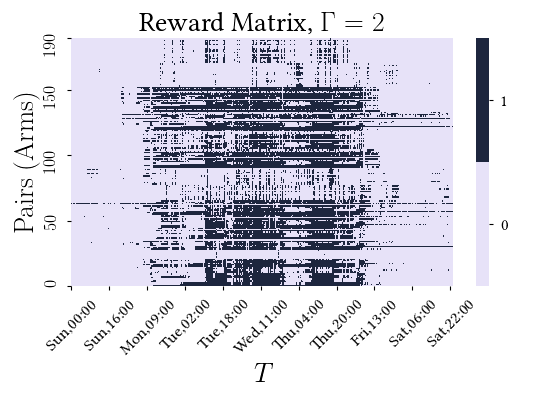

In [9]:
%matplotlib notebook

from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
# cmap is now a list of colors
cmap = sns.cubehelix_palette(start=2.8, rot=.1, light=0.9, n_colors=2)

cmap = ListedColormap(cmap)

indexstart = datetime.strptime("2016/07/17", "%Y/%m/%d")
index = [indexstart + timedelta(seconds=x*100) for x in range(gains.shape[0])]
gains.index = pd.DatetimeIndex(index)

fig, ax = plt.subplots(figsize=(7,5))   
ax = sns.heatmap(gains.transpose(), cmap=cmap, ax=ax, rasterized=True)

labels = [x.strftime("%a,%H:00") for x in index[::600]]
ticks = [i for i,x in enumerate(index)][::600]

ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

# Customize tick marks and positions
cbar_ax = ax.collections[0].colorbar

cbar_ax.set_ticks([ 0.25, 0.75])
cbar_ax.set_ticklabels(['0', '1'])

# X - Y axis labels
ax.set_ylabel('$\mathrm{Pairs~(Arms)}$')
ax.set_xlabel('$T$')

ax.set_yticks([x for x in gains.columns if x%20==0])
ax.set_yticklabels([r'$%s$'%x for x in gains.columns if x%20==0])

plt.ylim((0,190))
plt.yticks([0,50,100,150,190],["$0$","$50$","$100$","$150$", "$190$"])
plt.title('Reward Matrix, $\Gamma = 2$')
plt.tight_layout()

plt.savefig("reward_heatmap_100.pdf")

<IPython.core.display.Javascript object>


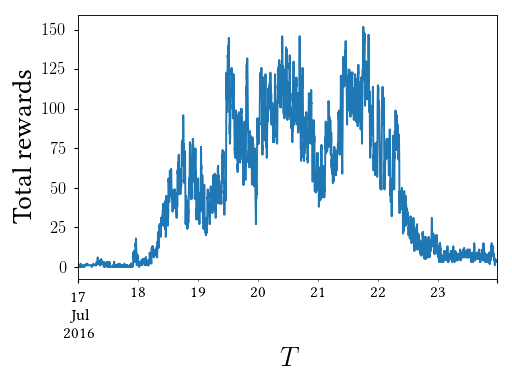

In [10]:
%matplotlib notebook
ax = gains.transpose().sum().plot(rasterized=True)

labels = [x.strftime("%a,%H:00") for x in index[::600]]
ticks = [i for i,x in enumerate(index)][::600]

plt.xlabel('$T$')
plt.ylabel("Total rewards")
plt.tight_layout()

In [11]:
gains.transpose().sum().index

DatetimeIndex(['2016-07-17 00:00:00', '2016-07-17 00:01:40',
               '2016-07-17 00:03:20', '2016-07-17 00:05:00',
               '2016-07-17 00:06:40', '2016-07-17 00:08:20',
               '2016-07-17 00:10:00', '2016-07-17 00:11:40',
               '2016-07-17 00:13:20', '2016-07-17 00:15:00',
               ...
               '2016-07-23 23:28:20', '2016-07-23 23:30:00',
               '2016-07-23 23:31:40', '2016-07-23 23:33:20',
               '2016-07-23 23:35:00', '2016-07-23 23:36:40',
               '2016-07-23 23:38:20', '2016-07-23 23:40:00',
               '2016-07-23 23:41:40', '2016-07-23 23:43:20'],
              dtype='datetime64[ns]', length=6039, freq=None)

In [12]:
ax.get_xticks()

array([1468713600, 1469317400])

In [13]:
ticks

[0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000]

In [14]:
labels

['Sun,00:00',
 'Sun,16:00',
 'Mon,09:00',
 'Tue,02:00',
 'Tue,18:00',
 'Wed,11:00',
 'Thu,04:00',
 'Thu,20:00',
 'Fri,13:00',
 'Sat,06:00',
 'Sat,22:00']

<IPython.core.display.Javascript object>


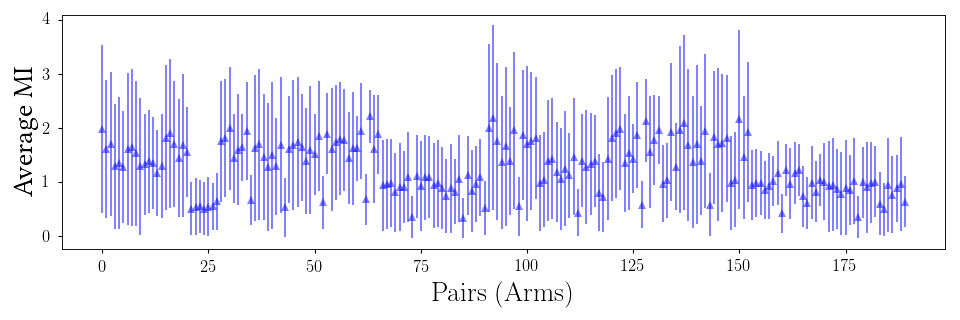

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(12,4))
plt.errorbar(masterdata.columns, masterdata.mean(), masterdata.std(), linestyle='None', marker='^', c="Blue", alpha=0.5)
plt.xlabel('$\mathrm{Pairs~(Arms)}$')
plt.ylabel(r"Average MI")
plt.tight_layout()

plt.savefig("MI_avg_std.pdf")


<IPython.core.display.Javascript object>


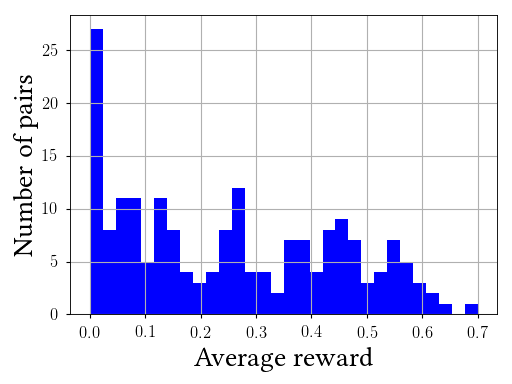

In [16]:
%matplotlib notebook
gains.mean().hist(bins=30, color="Blue")
plt.xlabel(r"Average reward")
plt.ylabel(r"Number of pairs")
plt.tight_layout()

In [17]:
# Generate some data that is stationary

newmasterdata = pd.DataFrame()
i = 0
for x,y in zip(masterdata.mean(), masterdata.std()):
    newmasterdata[i] = np.random.normal(x,y,masterdata.shape[0])
    i += 1
newmasterdata.shape

(6039, 190)

In [18]:
gains = (newmasterdata > 2).astype(int)#.iloc[0:800,:]

<IPython.core.display.Javascript object>


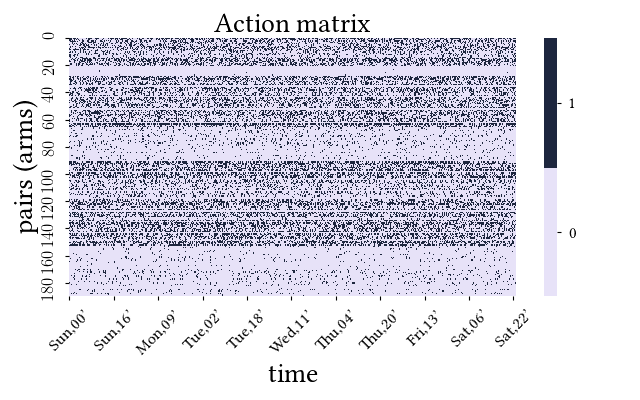

In [19]:
%matplotlib notebook

from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
# cmap is now a list of colors
cmap = sns.cubehelix_palette(start=2.8, rot=.1, light=0.9, n_colors=2)

cmap = ListedColormap(cmap)

indexstart = datetime.strptime("2016/07/17", "%Y/%m/%d")
index = [indexstart + timedelta(seconds=x*100) for x in range(gains.shape[0])]
gains.index = pd.DatetimeIndex(index)

fig, ax = plt.subplots(figsize=(8,5))   
ax = sns.heatmap(gains.transpose(), cmap=cmap, ax=ax)

labels = [x.strftime("%a,%H'") for x in index[::600]]
ticks = [i for i,x in enumerate(index)][::600]

ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

# Customize tick marks and positions
cbar_ax = ax.collections[0].colorbar

cbar_ax.set_ticks([ 0.25, 0.75])
cbar_ax.set_ticklabels(['0', '1'])

# X - Y axis labels
ax.set_ylabel('pairs (arms)')
ax.set_xlabel('time')

ax.set_yticks([x for x in gains.columns if x%20==0])
ax.set_yticklabels([r'$%s$'%x for x in gains.columns if x%20==0])

plt.title("Action matrix")
plt.tight_layout()

#plt.savefig("reward_heatmap.png")

In [15]:
#newmasterdata.to_csv("scenario1_%s_MI_1000_100.csv"%dataset, index=False, header=False)